In [1]:
import sys 
# !conda install --yes --prefix {sys.prefix} pywaffle
# !{sys.executable} -m pip install --user pywaffle

In [2]:
import pandas as pd
import numpy as np
from datetime import date
import time

import pygal
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn
from pywaffle import Waffle

In [3]:
full = \
pd.ExcelFile('/Users/mansi.parikh/Downloads/Case Study - People Analytics Data Scientist and Data Engineer.xlsx')

In [4]:
data = pd.read_excel(full, 'Recruiting Activity Data', skiprows = 2)
print(data.shape)
print(data.dtypes)
data.head()

(7780, 21)
Candidate ID Number                           int64
Position Title                               object
Department                                   object
Furthest Recruiting Stage Reached            object
Date of Application                          object
Date Application Closed              datetime64[ns]
Application Source                           object
Years of Experience                           int64
Candidate Type                               object
Degree                                       object
School                                       object
Major                                        object
Degree.1                                     object
School.1                                     object
Major.1                                      object
Degree.2                                     object
School.2                                     object
Major.2                                      object
Degree.3                                     object
S

,Candidate ID Number,Position Title,Department,Furthest Recruiting Stage Reached,Date of Application,Date Application Closed,Application Source,Years of Experience,Candidate Type,Degree,...,Major,Degree.1,School.1,Major.1,Degree.2,School.2,Major.2,Degree.3,School.3,Major.3
0,3668741,Associate Product Manager,Product,New Application,2016-11-17 00:00:00,2016-12-03,Campus Event,0,Campus,Bachelors,...,Computer Science,Bachelors,UC Berkeley,Physics,NaN,NaN,NaN,NaN,NaN,NaN
1,783317,Operations Coordinator,Operations,New Application,2017-12-22 00:00:00,2017-12-27,Campus Job Board,0,Campus,Bachelors,...,Political Science,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2046362,Business Operations Manager,Operations,New Application,2018-06-20 00:00:00,2018-06-24,Agency,6,Experienced,Bachelors,...,Statistics,Masters,NYU,Computer Science,Masters,University of Washington,Mathematics,NaN,NaN,NaN
3,39321,Systems Engineer,Engineering,New Application,2018-09-04 00:00:00,2018-09-07,Career Fair,0,Campus,Bachelors,...,Computer Science,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,222272,Operations Generalist,Operations,New Application,2018-11-08 00:00:00,2018-11-14,Campus Job Board,2,Campus,PhD,...,Physics,Bachelors,Columbia,Statistics,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
offer = pd.read_excel(full, 'Offer Response Data')
print(offer.shape)
print(offer.dtypes)
offer.head()

(134, 2)
Candidate ID Number     int64
Offer Decision         object
dtype: object


,Candidate ID Number,Offer Decision
0,3368,Offer Accepted
1,10008,Offer Accepted
2,2790,Offer Accepted
3,3500,Offer Accepted
4,2675,Offer Accepted


In [6]:
# identifying date issues in the "Date of Application column" and fixing them in "App_Date"
# bringing out of range dates one day back since they represent the end of their respective months
print(data["Date of Application"].dtype)
data["App_Date"] = pd.to_datetime(data["Date of Application"].astype(str), errors='coerce')
print("Problematic dates: ", data[data["App_Date"].isnull()]["Date of Application"].unique())
data["Date of Application"] = np.select([data["Date of Application"] == '6/31/2016', 
                                         data["Date of Application"] == '2/29/2018',
                                         data["Date of Application"] == '9/31/2016'], 
                                        ['6/30/2016','2/28/2018','9/30/2016'], 
                                        default = data["Date of Application"] )
# data["App_Date"] = pd.to_datetime(data["Date of Application"].astype(str), errors='coerce')
data["App_Date"] = pd.to_datetime(data["Date of Application"]).dt.date
print(data["App_Date"].dtype)
print("Problematic dates: ", data[data["App_Date"].isnull()]["Date of Application"].unique())

object
Problematic dates:  ['6/31/2016' '2/29/2018' '9/31/2016']
object
Problematic dates:  []


In [7]:
# extracting year from "App_Date"
# data["App_Year"] = data["App_Date"].dt.year
data['App_Year'] = pd.DatetimeIndex(data['App_Date']).year
# checking the volume of 2019 data
print(data[data.App_Year == 2019][["Candidate ID Number"]])
data.head()

     Candidate ID Number
118                 2531


,Candidate ID Number,Position Title,Department,Furthest Recruiting Stage Reached,Date of Application,Date Application Closed,Application Source,Years of Experience,Candidate Type,Degree,...,School.1,Major.1,Degree.2,School.2,Major.2,Degree.3,School.3,Major.3,App_Date,App_Year
0,3668741,Associate Product Manager,Product,New Application,2016-11-17 00:00:00,2016-12-03,Campus Event,0,Campus,Bachelors,...,UC Berkeley,Physics,NaN,NaN,NaN,NaN,NaN,NaN,2016-11-17,2016
1,783317,Operations Coordinator,Operations,New Application,2017-12-22 00:00:00,2017-12-27,Campus Job Board,0,Campus,Bachelors,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-22,2017
2,2046362,Business Operations Manager,Operations,New Application,2018-06-20 00:00:00,2018-06-24,Agency,6,Experienced,Bachelors,...,NYU,Computer Science,Masters,University of Washington,Mathematics,NaN,NaN,NaN,2018-06-20,2018
3,39321,Systems Engineer,Engineering,New Application,2018-09-04 00:00:00,2018-09-07,Career Fair,0,Campus,Bachelors,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-04,2018
4,222272,Operations Generalist,Operations,New Application,2018-11-08 00:00:00,2018-11-14,Campus Job Board,2,Campus,PhD,...,Columbia,Statistics,NaN,NaN,NaN,NaN,NaN,NaN,2018-11-08,2018


In [8]:
# checking the counts for the two similar positions separately and together
print("Systems: ", data.loc[data["Position Title"]=="Systems Engineer","Position Title"].count())
print("System: ", data.loc[data["Position Title"]=="System Engineer","Position Title"].count())
calcd_total = data.loc[data["Position Title"]=='Systems Engineer',"Position Title"].count() + \
              data.loc[data["Position Title"]=="System Engineer","Position Title"].count()
str_total = data.loc[data["Position Title"].str.contains('System'),"Position Title"].count()
if calcd_total == str_total:
    print("Total: {}".format(calcd_total))
else: 
    print("Calculated Total: {}".format(calcd_total))
# doing the replacement of one to another and effectively combining both
data["Position Title"] = data["Position Title"].replace("System Engineer", "Systems Engineer") 
# re-checking the counts after the data transformation
combo = data.loc[data["Position Title"]=='Systems Engineer',"Position Title"].count()
print("NEW Systems: {}".format(combo))
print("NEW System: ", data.loc[data["Position Title"]=="System Engineer","Position Title"].count())
# confirmation on whether or not the data transformation worked as intended
if calcd_total == combo: 
    print("No data loss!")
else: 
    print("Potential data loss.")

Systems:  1645
System:  1166
Total: 2811
NEW Systems: 2811
NEW System:  0
No data loss!


In [9]:
# function to identify the candidate's latest school
def latest_School(row):
    if row["Degree"] != "Bachelors":
        return row["School"]
    else: 
        if pd.isnull(row["School.3"]) is False:
            return row["School.3"]
        elif pd.isnull(row["School.2"]) is False:
            return row["School.2"]
        elif pd.isnull(row["School.1"]) is False:
            return row["School.1"]
        else: 
            return row["School"]

# function to identify the candidate's latest school (version 2) which happens to be slower
def latest_School2(data): 
    hold = []
    for index, row in data.iterrows():
        if row["Degree"] != "Bachelors":
            school = row["School"]
        else: 
            if pd.isnull(row["School.3"]) is False:
                school = row["School.3"]
            elif pd.isnull(row["School.2"]) is False:
                school = row["School.2"]
            elif pd.isnull(row["School.1"]) is False:
                school = row["School.1"]
            else: 
                school = row["School"]
        hold.append(school)
    return hold

# function to identify the candidate's latest degree
# def latest_Degree(row):
#     if row["Degree"] != "Bachelors":
#         return row["Degree"]
#     else: 
#         if pd.isnull(row["Degree.3"]) is False:
#             return row["Degree.3"]
#         elif pd.isnull(row["Degree.2"]) is False:
#             return row["Degree.2"]
#         elif pd.isnull(row["Degree.1"]) is False:
#             return row["Degree.1"]
#         else: 
#             return row["Degree"]
        
# function to identify the candidate's latest education [school,degree]
def latest_Educ(row):
    if row["Degree"] != "Bachelors":
        return [row["School"],row["Degree"]]
    else: 
        if pd.isnull(row["Degree.3"]) is False:
            return [row["School.3"],row["Degree.3"]]
        elif pd.isnull(row["Degree.2"]) is False:
            return [row["School.2"],row["Degree.2"]]
        elif pd.isnull(row["Degree.1"]) is False:
            return [row["School.1"],row["Degree.1"]]
        else: 
            return [row["School"],row["Degree"]]

# function to assign numbers to specific steps
def furthest_Stage(row):
    if row["Furthest Recruiting Stage Reached"] == "New Application":
        return 1
    elif row["Furthest Recruiting Stage Reached"] == "Phone Screen":
        return 2
    elif row["Furthest Recruiting Stage Reached"] == "In-House Interview" \
      or row["Furthest Recruiting Stage Reached"] == "In-house Interview":
        return 3
    else: 
        return 4

In [10]:
# timing the first latest_school function
start = time.time()
data["Latest_School"] = data.apply(latest_School, axis=1)
end = time.time()
print(end - start)
# timing the second latest_school function
start = time.time()
data["Latest_School2"] = latest_School2(data)
data.head()
end = time.time()
print(end - start)

# data["Latest_School"], data["Latest_Degree"]  = data.apply(latest_School, axis=1), data.apply(latest_Degree, axis=1)
data["Latest_School"], data["Latest_Degree"] = data.apply(lambda row: latest_Educ(row)[0], axis=1), data.apply(lambda row: latest_Educ(row)[1], axis=1)
data["Furthest_Stage"] = data.apply(furthest_Stage, axis=1)

0.25980210304260254
0.6356210708618164


In [11]:
# 'systems engineer' de-duping
# involved adjusting recruitment stages and both application dates
uni_df = data.groupby(["Candidate ID Number", "Position Title","Department","Application Source",\
                       "Years of Experience","Candidate Type","Latest_School", "Latest_Degree","App_Year"],\
                       as_index=False).agg({"Furthest_Stage":'max',"App_Date":'min',"Date Application Closed":'max'})
uni_df.head()

,Candidate ID Number,Position Title,Department,Application Source,Years of Experience,Candidate Type,Latest_School,Latest_Degree,App_Year,Furthest_Stage,App_Date,Date Application Closed
0,2468,Operations Coordinator,Operations,Campus Job Board,2,Campus,University of Texas,PhD,2018,1,2018-11-01,2018-11-04
1,2468,Systems Engineer,Engineering,Campus Job Board,2,Campus,University of Texas,PhD,2018,4,2018-11-01,2018-11-14
2,2471,Associate Relationship Manager,Sales,Campus Event,0,Campus,MIT,Masters,2018,4,2018-12-13,2019-01-10
3,2475,Systems Engineer,Engineering,Advertisement,0,Campus,NYU,Masters,2018,4,2018-12-21,2019-01-11
4,2480,Associate Relationship Manager,Sales,Campus Event,0,Campus,MIT,Masters,2018,4,2018-12-25,2019-02-15


In [12]:
# aggregating by school and year to get YOY school applicant counts
yoy_schools = uni_df.groupby(["Latest_School","App_Year"], as_index=False).agg({"Candidate ID Number":'nunique'})
# removing the single 2019 data point from the result
yoy_schools = yoy_schools[yoy_schools.App_Year != 2019]
yoy_schools.rename(columns={'Candidate ID Number': "Candidate_Count"}, inplace=True)
yoy_schools.head()

,Latest_School,App_Year,Candidate_Count
0,Columbia,2016,188
1,Columbia,2017,193
2,Columbia,2018,269
3,Georgia Tech,2016,108
4,Georgia Tech,2017,108


In [13]:
# pivoting the YOY school applicant count table to get a better "YOY" visual
ys_pv = pd.pivot_table(yoy_schools, values="Candidate_Count", index=["Latest_School"], \
                       columns=["App_Year"], fill_value=0).reset_index().rename_axis(None, axis=1)
ys_pv

,Latest_School,2016,2017,2018
0,Columbia,188,193,269
1,Georgia Tech,108,108,132
2,Harvard,229,231,351
3,MIT,168,175,294
4,NYU,213,250,363
5,UC Berkeley,90,96,146
6,University of Michigan,74,58,115
7,University of Texas,123,155,224
8,University of Washington,65,82,103
9,Vanderbilt,91,101,163


In [14]:
# only joining the 'offer records' in the full data set to the offer response data and then retrieving the full data
# offers_only = uni_df[uni_df.Furthest_Stage == 4].merge(offer, how='inner', on="Candidate ID Number")
# all_others = uni_df[uni_df.Furthest_Stage != 4]
# all_others["Offer Decision"]=np.nan
# combo = offers_only.append(all_others) 
# combo

# joining the full data set to the offer response data and ensuring that only the 'offer records' have offer responses
uni_df = uni_df.merge(offer, how='left', on="Candidate ID Number")
uni_df["Offer Decision"].loc[uni_df.Furthest_Stage != 4] = np.nan
uni_df.head()

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Candidate ID Number,Position Title,Department,Application Source,Years of Experience,Candidate Type,Latest_School,Latest_Degree,App_Year,Furthest_Stage,App_Date,Date Application Closed,Offer Decision
0,2468,Operations Coordinator,Operations,Campus Job Board,2,Campus,University of Texas,PhD,2018,1,2018-11-01,2018-11-04,NaN
1,2468,Systems Engineer,Engineering,Campus Job Board,2,Campus,University of Texas,PhD,2018,4,2018-11-01,2018-11-14,Offer Response Pending
2,2471,Associate Relationship Manager,Sales,Campus Event,0,Campus,MIT,Masters,2018,4,2018-12-13,2019-01-10,Offer Response Pending
3,2475,Systems Engineer,Engineering,Advertisement,0,Campus,NYU,Masters,2018,4,2018-12-21,2019-01-11,Offer Response Pending
4,2480,Associate Relationship Manager,Sales,Campus Event,0,Campus,MIT,Masters,2018,4,2018-12-25,2019-02-15,Offer Response Pending


In [15]:
# function to give a view of all funnel stages together
def funnel_Stage(row):
    if row["Furthest_Stage"] == 1:
        return "New Application"
    elif row["Furthest_Stage"] == 2:
        return "Phone Screen"
    elif row["Furthest_Stage"] == 3:
        return "In-House Interview"
    else: 
        return "Offer Sent: {}".format(row["Offer Decision"])

In [16]:
# aggregating by department and candidate types to get a 2D funnel stage candidate monitor
uni_df["Funnel_Stage"] = uni_df.apply(funnel_Stage, axis=1)
funnel_pos = uni_df.groupby(["Department", "Candidate Type","Furthest_Stage","Funnel_Stage"],as_index=False)\
                        .agg({"Candidate ID Number":'nunique'})
funnel_pos.rename(columns={'Candidate ID Number': "Candidate_Count"}, inplace=True)
funnel_pos.head()

,Department,Candidate Type,Furthest_Stage,Funnel_Stage,Candidate_Count
0,Engineering,Campus,1,New Application,1629
1,Engineering,Campus,2,Phone Screen,359
2,Engineering,Campus,3,In-House Interview,270
3,Engineering,Campus,4,Offer Sent: Offer Accepted,26
4,Engineering,Campus,4,Offer Sent: Offer Declined,19


In [17]:
# comprehensive recruiting funnel for departments and candidate types without conversion rates 
# conversion rates, with the way they were described in the prompt and in the example, would be > 100% in some cases
# since applicants are only counted once per funnel rather than at all stages they've touched
fl_pv = pd.pivot_table(funnel_pos, values="Candidate_Count", index=["Department","Candidate Type"], \
                       columns=["Funnel_Stage"], fill_value=0).reset_index().rename_axis(None, axis=1)

fl_pv = fl_pv[["Department","Candidate Type", "New Application","Phone Screen","In-House Interview",\
              "Offer Sent: Offer Accepted", "Offer Sent: Offer Declined","Offer Sent: Offer Response Pending"]]
fl_pv

,Department,Candidate Type,New Application,Phone Screen,In-House Interview,Offer Sent: Offer Accepted,Offer Sent: Offer Declined,Offer Sent: Offer Response Pending
0,Engineering,Campus,1629,359,270,26,19,7
1,Engineering,Experienced,72,1,8,1,3,0
2,Finance,Campus,288,7,7,3,0,0
3,Finance,Experienced,163,26,13,1,2,0
4,IT,Campus,301,10,12,5,1,0
5,IT,Experienced,112,14,14,2,2,0
6,Operations,Campus,741,17,10,4,0,0
7,Operations,Experienced,230,55,61,9,4,0
8,Product,Campus,597,97,103,5,8,0
9,Product,Experienced,155,33,37,5,2,0


In [18]:
# calculating lapsed time from opening to closing the application (ie time spent in recruitment)
uni_df["Date Application Closed"] = pd.to_datetime(uni_df["Date Application Closed"]).dt.date
uni_df["Lapsed_Time"] = (uni_df["Date Application Closed"] - uni_df["App_Date"]).dt.days
uni_df.head()

,Candidate ID Number,Position Title,Department,Application Source,Years of Experience,Candidate Type,Latest_School,Latest_Degree,App_Year,Furthest_Stage,App_Date,Date Application Closed,Offer Decision,Funnel_Stage,Lapsed_Time
0,2468,Operations Coordinator,Operations,Campus Job Board,2,Campus,University of Texas,PhD,2018,1,2018-11-01,2018-11-04,NaN,New Application,3
1,2468,Systems Engineer,Engineering,Campus Job Board,2,Campus,University of Texas,PhD,2018,4,2018-11-01,2018-11-14,Offer Response Pending,Offer Sent: Offer Response Pending,13
2,2471,Associate Relationship Manager,Sales,Campus Event,0,Campus,MIT,Masters,2018,4,2018-12-13,2019-01-10,Offer Response Pending,Offer Sent: Offer Response Pending,28
3,2475,Systems Engineer,Engineering,Advertisement,0,Campus,NYU,Masters,2018,4,2018-12-21,2019-01-11,Offer Response Pending,Offer Sent: Offer Response Pending,21
4,2480,Associate Relationship Manager,Sales,Campus Event,0,Campus,MIT,Masters,2018,4,2018-12-25,2019-02-15,Offer Response Pending,Offer Sent: Offer Response Pending,52


In [19]:
# aggregating by position, stage, year to get YOY estimates for average recruitment times for positions and stages
recruit_time = uni_df.groupby(["Position Title","App_Year","Furthest_Stage"],\
                              as_index=False).agg({"Lapsed_Time":'mean'})
recruit_time = recruit_time[recruit_time.App_Year != 2019]
recruit_time["App_Year"] = recruit_time["App_Year"].apply(str)
# recruit_time["Furthest_Stage"] = recruit_time["Furthest_Stage"].apply(str)
recruit_time = recruit_time.round(2)
conditions = [recruit_time.Furthest_Stage == 1, recruit_time.Furthest_Stage == 2,
              recruit_time.Furthest_Stage == 3, recruit_time.Furthest_Stage == 4]
choices = ["1)App", "2)Phone", "3)Interview", "4)Offer"]
recruit_time["Stage"] = np.select(conditions, choices, default='Other')
recruit_time.head()

,Position Title,App_Year,Furthest_Stage,Lapsed_Time,Stage
0,Account Executive,2016,1,7.67,1)App
1,Account Executive,2016,3,14.00,3)Interview
2,Account Executive,2017,1,6.88,1)App
3,Account Executive,2017,2,14.00,2)Phone
4,Account Executive,2017,3,22.62,3)Interview


In [20]:
# for each position, calculating average time spent in recruitment for people who didn't move pass the phone stage
phone_time = uni_df.loc[uni_df.Furthest_Stage == 2].groupby(["Position Title"],\
                                                    as_index=True).agg({"Lapsed_Time":'mean'})
phone_time = phone_time.round(2) 
phone_time = phone_time.rename(columns={"Lapsed_Time": "Phone_Time"})
phone_time.head()

,Phone_Time
Position Title,
Account Executive,10.85
Associate Product Manager,24.88
Associate Relationship Manager,11.92
Business Operations Manager,13.69
Finance Manager,12.81


In [21]:
# pivoting the YOY position-based 'time spent in recruitment for various stages' table to get a better "YOY" visual
# recruit_time = recruit_time.merge(phone_time, how='inner', on="Position Title")
rc_pv = recruit_time.pivot_table(values="Lapsed_Time", index=["Position Title"]\
                                 , columns=["Stage","App_Year"]\
                                 , fill_value=0) #.reset_index().rename_axis(None, axis=0)
rc_pv.columns = rc_pv.columns.ravel()
rc_pv.columns = ['_'.join(tup).rstrip('_') for tup in rc_pv.columns.values]
rc_pv

# rc_pv = recruit_time.pivot_table(values="Lapsed_Time", index=["Position Title"]\
#                                   , columns=["App_Year", "Furthest_Stage", "Phone_Time"]\
#                                   , fill_value=0) #.reset_index().rename_axis(None, axis=0)
# rc_pv

,1)App_2016,1)App_2017,1)App_2018,2)Phone_2016,2)Phone_2017,2)Phone_2018,3)Interview_2016,3)Interview_2017,3)Interview_2018,4)Offer_2016,4)Offer_2017,4)Offer_2018
Position Title,,,,,,,,,,,,
Account Executive,7.67,6.88,7.36,0.00,14.00,10.43,14.00,22.62,20.83,0.00,38.00,31.00
Associate Product Manager,18.16,18.37,18.78,24.87,23.94,26.56,32.61,35.00,33.56,43.00,54.50,50.75
Associate Relationship Manager,6.66,6.52,6.63,11.38,13.00,11.91,20.52,20.39,20.21,34.83,32.00,39.92
Business Operations Manager,6.44,6.05,7.23,13.50,14.55,13.23,20.73,20.00,20.96,33.00,35.00,33.75
Finance Manager,7.35,5.88,6.92,12.25,12.60,13.62,18.60,23.17,22.50,22.00,44.00,49.00
Financial Analyst,6.90,5.84,6.16,23.00,14.00,12.80,25.00,0.00,20.67,0.00,42.00,38.00
IT Analyst,6.76,6.63,5.76,0.00,12.89,5.00,19.00,22.60,14.00,0.00,37.00,0.00
Operations Coordinator,6.16,6.49,6.52,13.00,10.75,16.00,14.00,0.00,16.50,52.00,40.33,0.00
Operations Generalist,5.98,6.82,6.56,12.75,13.00,17.00,21.00,19.00,17.00,0.00,0.00,0.00


In [22]:
# combining the YOY visual with average time spent for phone-screen knockouts and sorting the table
combo = rc_pv.join(phone_time)
combo = combo.sort_values(["Phone_Time"], axis=0, ascending=False)
combo

,1)App_2016,1)App_2017,1)App_2018,2)Phone_2016,2)Phone_2017,2)Phone_2018,3)Interview_2016,3)Interview_2017,3)Interview_2018,4)Offer_2016,4)Offer_2017,4)Offer_2018,Phone_Time
Position Title,,,,,,,,,,,,,
Associate Product Manager,18.16,18.37,18.78,24.87,23.94,26.56,32.61,35.00,33.56,43.00,54.50,50.75,24.88
Sr. Product Manager,17.36,18.11,17.22,31.00,26.12,21.30,40.00,33.12,32.60,0.00,39.00,46.75,23.84
UX Designer,18.57,18.53,18.45,0.00,25.33,20.80,34.50,30.00,28.25,0.00,42.00,32.00,23.71
Financial Analyst,6.90,5.84,6.16,23.00,14.00,12.80,25.00,0.00,20.67,0.00,42.00,38.00,14.43
Business Operations Manager,6.44,6.05,7.23,13.50,14.55,13.23,20.73,20.00,20.96,33.00,35.00,33.75,13.69
Operations Generalist,5.98,6.82,6.56,12.75,13.00,17.00,21.00,19.00,17.00,0.00,0.00,0.00,13.50
Operations Coordinator,6.16,6.49,6.52,13.00,10.75,16.00,14.00,0.00,16.50,52.00,40.33,0.00,13.27
Sr. Business Analyst,6.64,6.68,5.88,12.14,13.67,13.00,21.83,21.25,0.00,43.00,31.00,0.00,12.86
Finance Manager,7.35,5.88,6.92,12.25,12.60,13.62,18.60,23.17,22.50,22.00,44.00,49.00,12.81


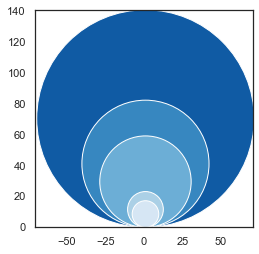

4959 Applicants
1695 Phone Screens
876 In-House Interviews
134 Offers Sent
74 Offers Accepted


In [23]:
# progression through the recruitment process for the full data set
# shows how the large pool of applicants dwindles down to only a few accepted offers
seaborn.set(style='white')

appli_count = uni_df["Candidate ID Number"].nunique()
phone_count = uni_df.loc[uni_df["Furthest_Stage"]!=1,"Candidate ID Number"].nunique()
iview_count = uni_df.loc[uni_df["Furthest_Stage"]==3,"Candidate ID Number"].nunique() + \
              uni_df.loc[uni_df["Furthest_Stage"]==4,"Candidate ID Number"].nunique()
offer_count = uni_df.loc[uni_df["Furthest_Stage"]==4,"Candidate ID Number"].nunique()
accept_count = uni_df.loc[uni_df["Funnel_Stage"]=="Offer Sent: Offer Accepted","Candidate ID Number"].nunique()

populations = np.sqrt([appli_count, phone_count, iview_count, offer_count, accept_count])
cp = seaborn.color_palette('Blues_r', n_colors=len(populations))

fig, ax = plt.subplots()

for n, p in enumerate(populations):
    circle = plt.Circle((1, p), radius=p, facecolor=cp[n])
    ax.add_artist(circle)

ax.set_xlim(-max(populations), max(populations))
ax.set_ylim(0, 2 * max(populations))
ax.set_aspect('equal')

plt.show()

print("{} Applicants\n{} Phone Screens\n{} In-House Interviews\n{} Offers Sent\n{} Offers Accepted"\
      .format(appli_count,phone_count,iview_count,offer_count,accept_count))

In [24]:
# comparing performance for candidates with different levels of education
# counting how applicants have progressed through the recruitment stages -- and only once per funnel
educ_funnel = uni_df.groupby(["Latest_Degree","Furthest_Stage"],as_index=False)\
.agg({"Candidate ID Number":'nunique'})
educ_funnel.head()

,Latest_Degree,Furthest_Stage,Candidate ID Number
0,Bachelors,1,2802
1,Bachelors,2,478
2,Bachelors,3,364
3,Bachelors,4,85
4,JD,1,3


In [25]:
# pivoting the education-stage candidate monitor in different ways for visualization ease and viz function
ef_pv = educ_funnel.pivot_table(values="Candidate ID Number", index=["Furthest_Stage"], columns=["Latest_Degree"]\
                                  , fill_value=0).reset_index().rename_axis(None, axis=0)
ef_pv1 = educ_funnel.pivot_table(values="Candidate ID Number", index=["Latest_Degree"], columns=["Furthest_Stage"]\
                                  , fill_value=0).reset_index().rename_axis(None, axis=0)
ef_pv1 = ef_pv1.reindex([0,2,3,1]).rename_axis(None, axis=1)
ef_pv1.columns = ["Latest_Degree","New Application","Phone Screen","In-House Interview","Offer Sent"]
ef_pv1

,Latest_Degree,New Application,Phone Screen,In-House Interview,Offer Sent
0,Bachelors,2802,478,364,85
2,Masters,680,115,105,18
3,PhD,570,256,272,30
1,JD,3,5,1,1


In [26]:
# dot chart to see recruitment, showing candidate only one per funnel, for different levels of education
a = [] ; b = [] ; c = [] ; d = []
dot_chart = pygal.Dot(x_label_rotation=30)
dot_chart.title = "Education Funnel"
dot_chart.x_labels = ["New Application","Phone Screen","In-House Interview","Offer Sent"]
for index, row in ef_pv.iterrows():
    a.append(row["Bachelors"]) ; b.append(row["Masters"]) ; c.append(row["PhD"]) ; d.append(row["JD"]) 
dot_chart.add("Bachelors",a) ; dot_chart.add("Masters",b)
dot_chart.add("PhD",c) ; dot_chart.add("JD",d)
dot_chart.render_to_file("educ_funnel.svg")

In [27]:
# dot chart to see recruitment, showing candidate only one per funnel, for different levels of education EXCLUDING BACHELORS
a = [] ; b = [] ; c = []
dot_chart = pygal.Dot(x_label_rotation=30)
dot_chart.title = "Education Funnel"
dot_chart.x_labels = ["New Application","Phone Screen","In-House Interview","Offer Sent"]
for index, row in ef_pv.iterrows():
    a.append(row["Masters"]) ; b.append(row["PhD"]) ; c.append(row["JD"]) 
dot_chart.add("Masters",a) ; dot_chart.add("PhD",b) ; dot_chart.add("JD",c)
dot_chart.render_to_file("educ_funnel2.svg")

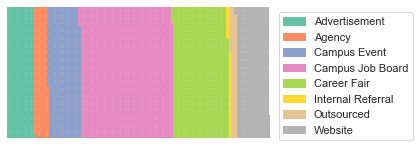

In [28]:
# showing effectiveness of different application sources by comparing numbers of applicants 
source_apps = uni_df.groupby(["Application Source"],as_index=False)\
                    .agg({"Candidate ID Number":'nunique'})
source_apps = source_apps.set_index('Application Source')["Candidate ID Number"].to_dict()

fig = plt.figure(
    FigureClass=Waffle, 
    rows=50, 
    values=source_apps, 
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.01, 1)})
plt.show()

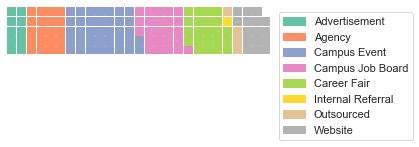

In [29]:
# showing effectiveness of different application sources by comparing numbers of offers sent
source_offers = uni_df.loc[uni_df["Furthest_Stage"]==4,]\
                    .groupby(["Application Source"],as_index=False)\
                    .agg({"Candidate ID Number":'nunique'})
source_offers = source_offers.set_index('Application Source')["Candidate ID Number"].to_dict()

fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=source_offers, 
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.01, 1)})
plt.show()

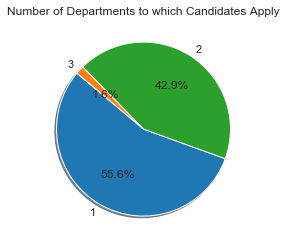

In [30]:
# calculating number of departments to which candidates apply 
dept_count = uni_df.groupby(["Candidate ID Number"],as_index=False)\
                    .agg({"Department":'nunique'})
dept_count
dept_cands = dept_count.groupby(["Department"],as_index=False)\
                    .agg({"Candidate ID Number":'nunique'})
dept_cands

colors = ["#1f77b4", "#2ca02c", "#ff7f0e"] # , "#d62728", "#8c564b"
explode = (0, 0, 0)  
plt.pie(dept_cands["Candidate ID Number"], labels=dept_cands["Department"], explode=explode, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Number of Departments to which Candidates Apply")
plt.show()

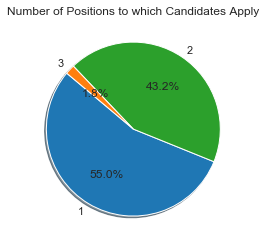

In [31]:
# calculating number of positions to which candidates apply 
pos_count = uni_df.groupby(["Candidate ID Number"],as_index=False)\
                    .agg({"Position Title":'nunique'})
pos_count
pos_cands = pos_count.groupby(["Position Title"],as_index=False)\
                    .agg({"Candidate ID Number":'nunique'})
pos_cands

colors = ["#1f77b4", "#2ca02c", "#ff7f0e"] # , "#d62728", "#8c564b"
explode = (0, 0, 0)  
plt.pie(pos_cands["Candidate ID Number"], labels=pos_cands["Position Title"], explode=explode, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Number of Positions to which Candidates Apply")
plt.show()